# Artificial Intelligence and Expert Systems Group 3 - STUDENTS


# Importing the DATA and the Libraries

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mea
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, PolynomialFeatures
kf5 = KFold(n_splits=5, shuffle=True)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_excel("C:/Users/Semih/Desktop/OKUL/END_AI/data/training_data.xlsx")
df_test = pd.read_excel("C:/Users/Semih/Desktop/OKUL/END_AI/data/test_data_excel.xlsx")
X_normal = df.loc[:, df.columns[1:]]
Y_normal = df.loc[:, df.columns[0]]

In [3]:
# I am going to split my data as 80% training and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y_normal, test_size=0.2, random_state=34)

In [4]:
errors = {"first":0,
         "second":0,
         "third":0,
         "fourth":0,
         "fifth":0}
cv_errors = {"first":0,
         "second":0,
         "third":0,
         "fourth":0,
         "fifth":0}

### Turn Categorical DATAS into Numerical DATAS

# Approach
We believe that there is a relation between the same categorical datas such as shift types of manual and auto and other such categories. Because of that, we decided to use ordinal encoding for categorical data rather than using one-hot encoding which is based on the unrelated data.

In [5]:
# ordinal numeric values
Types = {"LPG":1,
         "Diesel":2,
        "Gasoline":3}

Shifts = {"Manual":1,
         "Auto":2}

Sellers = {"Owner":1,
          "Dealer":2}

# I may still use the normal data
X_normal["Type"] = X_normal.Type.replace(Types)
X_normal["Shift"] = X_normal.Shift.replace(Shifts)
X_normal["Seller"] = X_normal.Seller.replace(Sellers)

X_train["Type"] = X_normal.Type.replace(Types)
X_train["Shift"] = X_normal.Shift.replace(Shifts)
X_train["Seller"] = X_normal.Seller.replace(Sellers)

X_test["Type"] = X_normal.Type.replace(Types)
X_test["Shift"] = X_normal.Shift.replace(Shifts)
X_test["Seller"] = X_normal.Seller.replace(Sellers)

df_test["Type"] = df_test.Type.replace(Types)
df_test["Shift"] = df_test.Shift.replace(Shifts)
df_test["Seller"] = df_test.Seller.replace(Sellers)

# Understand the DATA

Year: 


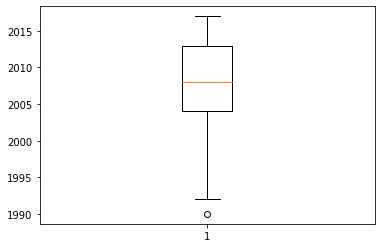

Type: 


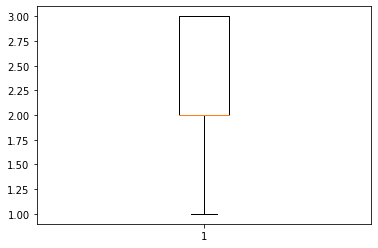

Shift: 


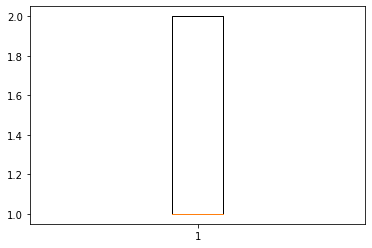

km: 


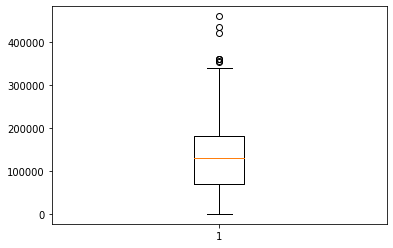

Power: 


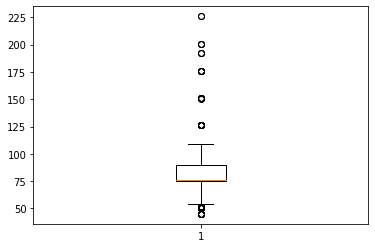

Engine: 


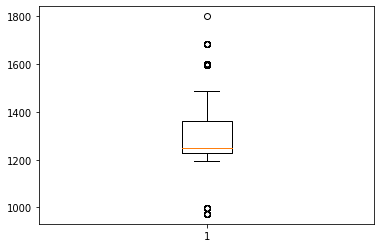

Seller: 


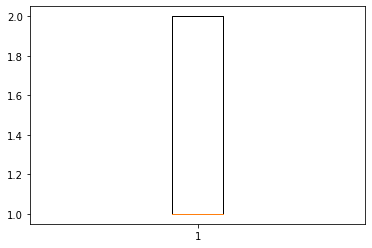

In [6]:
for col in X_normal.columns:
    print(f"{col}: ")
    plt.boxplot(X_normal[col])
    plt.show()

Year: 


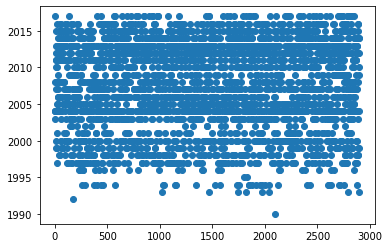

Type: 


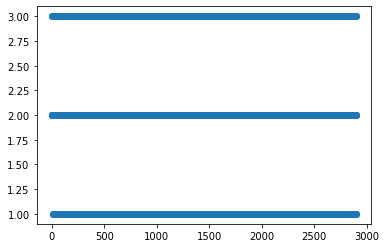

Shift: 


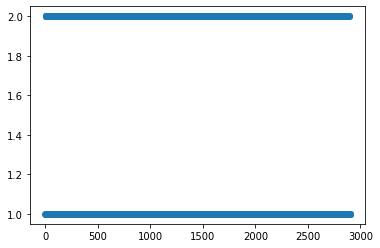

km: 


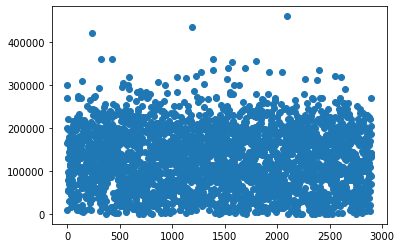

Power: 


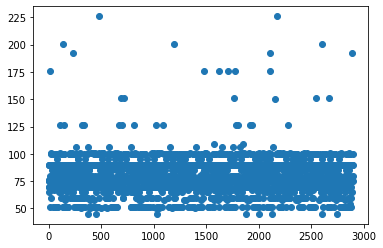

Engine: 


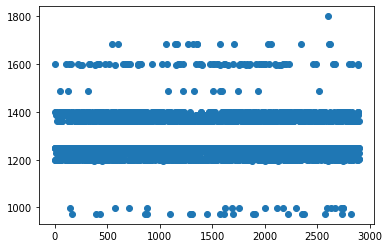

Seller: 


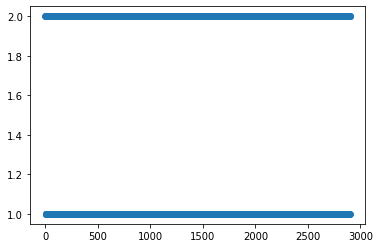

In [7]:
for col in X_normal.columns:
    print(f"{col}: ")
    plt.scatter(range(len(X_normal[col])), X_normal[col])
    plt.show()

In [8]:
X_normal.std()

Year          5.927166
Type          0.767547
Shift         0.469287
km        71857.402430
Power        15.425954
Engine      101.215621
Seller        0.495999
dtype: float64

In [9]:
print("Diesel type mean price: ", df.Price.loc[df.Type == "Diesel"].mean())
print("Gasoline type mean price: ", df.Price.loc[df.Type == "Gasoline"].mean())
print("LPG mean type price: ", df.Price.loc[df.Type == "LPG"].mean())

Diesel type mean price:  34954.353099730455
Gasoline type mean price:  40629.235657546335
LPG mean type price:  26817.634556574925


In [10]:
print("Manual shift type mean price: ", df.Price.loc[df.Shift == "Manual"].mean())
print("Auto shift mean price: ", df.Price.loc[df.Shift == "Auto"].mean())

Manual shift type mean price:  32074.440287032292
Auto shift mean price:  42042.80189673341


In [11]:
print("Owner shift type mean price: ", df.Price.loc[df.Seller == "Owner"].mean())
print("Dealler shift mean price: ", df.Price.loc[df.Seller == "Dealer"].mean())

Owner shift type mean price:  33756.13639143731
Dealler shift mean price:  37379.10592885376


In [12]:
X_normal.head(12)

,Year,Type,Shift,km,Power,Engine,Seller
0,2004,2,1,270000,70,1248,2
1,2004,3,1,164000,75,1199,2
2,2008,2,2,300000,90,1248,2
3,2017,3,2,8780,90,1398,2
4,2004,2,1,200000,70,1248,1
5,2003,2,1,130000,76,1601,2
6,2011,2,1,197000,75,1248,2
7,2000,3,1,169000,65,1199,2
8,2007,3,2,97000,76,1201,1
9,1999,1,1,221000,90,1389,1


## For which data part, what kind of scaling approach to be applied
Year <b>minmax</b>,   
Type <b>no need</b>,
Shift <b>no need</b>,
km <b>minmax</b>,
Power <b>minmax</b>,
Engine <b>minmax</b>,
Seller <b>no need</b>

In [13]:
X_normal[["Year", "km", "Power", "Engine"]]

,Year,km,Power,Engine
0,2004,270000,70,1248
1,2004,164000,75,1199
2,2008,300000,90,1248
3,2017,8780,90,1398
4,2004,200000,70,1248
...,...,...,...,...
2895,1993,187000,76,1201
2896,2009,68500,80,1229
2897,2012,142257,100,1364
2898,2010,135000,90,1248


In [14]:
# min max scaler
X_normal[["Year", "km", "Power", "Engine"]] = MinMaxScaler().fit_transform(X_normal[["Year", "km", "Power", "Engine"]])

min_max_scaler2 = MinMaxScaler()
X_train[["Year", "km", "Power", "Engine"]] = min_max_scaler2.fit_transform(X_train[["Year", "km", "Power", "Engine"]])
print(min_max_scaler2.scale_)
X_test[["Year", "km", "Power", "Engine"]] = min_max_scaler2.transform(X_test[["Year", "km", "Power", "Engine"]])
df_test[["Year", "km", "Power", "Engine"]] = min_max_scaler2.transform(df_test[["Year", "km", "Power", "Engine"]])

[3.70370370e-02 2.17391304e-06 5.52486188e-03 1.20772947e-03]


In [15]:
X_train.head(10)

,Year,Type,Shift,km,Power,Engine,Seller
1922,0.851852,2,1,0.282609,0.165746,0.332126,2
127,0.592593,2,2,0.363043,0.138122,0.332126,1
1113,0.296296,3,1,0.308696,0.248619,0.502415,1
2303,0.518519,3,1,0.306522,0.082873,0.030193,1
581,0.370370,3,1,0.461957,0.110497,0.272947,1
2792,0.333333,1,2,0.510870,0.248619,0.502415,1
1918,0.740741,3,1,0.184783,0.193370,0.309179,2
561,0.518519,2,1,0.391304,0.027624,0.275362,1
2884,0.333333,1,1,0.478261,0.248619,0.502415,2
1912,0.851852,3,1,0.074457,0.220994,0.309179,2


In [16]:
X_test.head(100)

,Year,Type,Shift,km,Power,Engine,Seller
2702,0.333333,1,1,0.458696,0.248619,0.502415,1
1873,0.555556,3,1,0.311957,0.171271,0.275362,1
1446,0.444444,3,1,0.310000,0.248619,0.502415,2
976,0.555556,2,2,0.347826,0.138122,0.332126,2
1823,0.111111,1,1,0.534783,0.082873,0.502415,2
...,...,...,...,...,...,...,...
953,0.333333,3,1,0.310870,0.110497,0.272947,2
2480,0.851852,3,2,0.182609,0.303867,0.472222,2
448,0.851852,2,1,0.209783,0.165746,0.332126,1
1057,0.777778,2,1,0.241304,0.248619,0.332126,1


In [17]:
df_test.head(10)

,Year,Type,Shift,km,Power,Engine,Seller
0,0.851852,2,1,0.130435,0.165746,0.332126,1
1,0.518519,3,1,0.234783,0.193370,0.309179,2
2,0.555556,3,1,0.292391,0.193370,0.309179,1
3,0.370370,1,1,0.434783,0.248619,0.502415,2
4,0.481481,2,1,0.365217,0.033149,0.758454,1
5,0.888889,3,1,0.031087,0.220994,0.309179,1
6,0.666667,1,2,0.195576,0.171271,0.275362,1
7,0.555556,3,1,0.236957,0.171271,0.275362,1
8,0.814815,2,1,0.193478,0.165746,0.332126,1
9,0.333333,3,1,0.336957,0.110497,0.272947,1


Everything seems quite normal after scaling the data

# WITHOUT POLYNOMIAL FEATURES
## RIDGE REGRESSION

In order to find the best alpha value, I am going to take advante of RidgeCV function and numpy.linspace to obtain a list of different alpha values that I will feed into the ridge function.

In order to differentiate the alpha values, I am going to take the exponentiation of the list with 10

In [18]:
alphas = 10 ** np.linspace(10, -2, 100) * 0.5   # it will give me a set of 100 alpha values ranging
                                                # from -2 to 10
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [19]:
# Using every alpha values that I have in order to find the best
ridge_model = Ridge(random_state=34)
coefs = []
# I am just calculating the alpha values, so I don't actually need to split the training data for that
for alpha in alphas:
    ridge_model.set_params(alpha=alpha)
    ridge_model.fit(X_train, Y_train)
    coefs.append(ridge_model.coef_)

np.shape(coefs)

(100, 7)

Text(0, 0.5, 'weights')

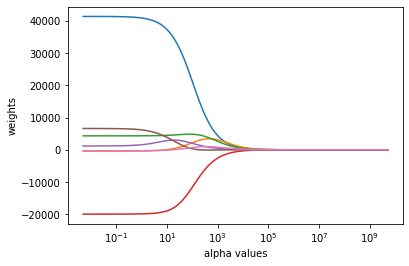

In [20]:
# let's find out how it looks like
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha values")
plt.ylabel("weights")
# print(*np.sum(coefs, axis=1),sep="\n")

Now I just want to see mean square error for a alpha value, by the way, R2 score nearer to 1 is better! What we are looking for is R2 score nearer to 1.

In [21]:
# now I will try to choose the best ones
ridge_model2 = Ridge(alpha = 4, random_state=34)
# print(X_train)
ridge_model2.fit(X_train, Y_train)             # Fit a ridge regression on the training data
pred2 = ridge_model2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge_model2.coef_, index = X_normal.columns)) # Print coefficients
print("MEA: ", mea(Y_test, pred2))          # Calculate the test MSE
print("R2: ", r2_score(Y_test, pred2))          # Calculate the test R2

Year      39575.166545
Type       -230.931783
Shift      4382.152664
km       -19612.956673
Power      2277.075683
Engine     5167.775864
Seller     -223.188611
dtype: float64
MEA:  3020.687589952697
R2:  0.8999120579003936


### Now I will try to use a very big Alpha value like 10**10

In [22]:
ridge_model3 = Ridge(alpha = 10 ** 10, random_state=34)
ridge_model3.fit(X_train, Y_train)             # Fit a ridge regression on the training data
pred3 = ridge_model3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge_model3.coef_, index = X_normal.columns)) # Print coefficients
print("MEA: ", mea(Y_test, pred3))          # Calculate the test MSE
print("R2: ", r2_score(Y_test, pred3))          # Calculate the test R2


Year      0.000564
Type      0.000906
Shift     0.000505
km       -0.000355
Power     0.000058
Engine   -0.000014
Seller    0.000195
dtype: float64
MEA:  11010.800939082175
R2:  -3.205441454490199e-07


# Using big penalty

Using big penalty shrinks the coeficients as we can clearly see to a very large degree, eventually
reducing to a model only shows the intercept behaviour. This over-shrinking makes the model more biased,
result in a higher MEA and very bad R2 score.

## So
So fitting a ridge regression model with alpha equals 4 leads to a much lower test MEA rather than
fitting a model with just an intercept, which is alpha value equals to 10. Besides that, we can evaulate the situation directly examining the R2 scores as well. So using an alpha value smaller than 4 is better.

## I will try to use Linear Regression
Which is simply alpha = 0 for ridge regression, let's see its scores as well!

In [23]:
linear_regression = Ridge(alpha=0, random_state=34)
linear_regression.fit(X_train, Y_train)
pred_l_reg = linear_regression.predict(X_test)
print(pd.Series(linear_regression.coef_, index=X_train.columns))
print("MEA: ", mea(pred_l_reg, Y_test))
print("R2: ", r2_score(pred_l_reg, Y_test))


Year      41360.154855
Type       -411.938916
Shift      4319.738921
km       -19957.358864
Power      1183.209075
Engine     6604.632295
Seller     -314.550050
dtype: float64
MEA:  2998.974447951688
R2:  0.8885579307340244


### Let's Also Try With the Normal Linear Regression

In [24]:
l_regression = LinearRegression()
l_regression.fit(X_train, Y_train)
pred_r = l_regression.predict(X_test)
print(pd.Series(l_regression.coef_, index=X_train.columns))
print("\nMEA: ", mea(pred_r, Y_test))

print("--let's round the R2 scores of two model, see whether they are nearly same: "
      , round(r2_score(pred_l_reg, Y_test) - r2_score(pred_r, Y_test), 8))
errors["first"] = r2_score(pred_r, Y_test)
print("First ERROR -> R2: ", errors["first"])
cv_errors["first"] = cross_val_score(l_regression, X_train, Y_train, cv=kf5, scoring="r2").mean()
print("First CV_Score, mean of the 5: ", cv_errors["first"])

Year      41360.154855
Type       -411.938916
Shift      4319.738921
km       -19957.358864
Power      1183.209075
Engine     6604.632295
Seller     -314.550050
dtype: float64

MEA:  2998.974447951688
--let's round the R2 scores of two model, see whether they are nearly same:  0.0
First ERROR -> R2:  0.8885579307340242
First CV_Score, mean of the 5:  0.8622874951869945


Okey then, instead of choosing arbitrarly and using the gut feeling, 
let's try to choose the best alpha values using Cross Validation function RidgeCV()

In [25]:
ridge_cv = RidgeCV(alphas=alphas, scoring="neg_mean_squared_error")
ridge_cv.fit(X_train, Y_train)
print("Best of alhpa: ", ridge_cv.alpha_)

Best of alhpa:  0.24885117821660568


In [26]:
ridge_final = Ridge(alpha=ridge_cv.alpha_, random_state=34)
ridge_final.fit(X_train, Y_train)
predict_final = ridge_final.predict(X_test)
print("MEA Final: ", mea(predict_final, Y_test))
print("Second ERROR -> R2 Final: ", r2_score(predict_final, Y_test))
errors["second"] = r2_score(predict_final, Y_test)
cv_errors["second"] = cross_val_score(ridge_final, X_train, Y_train, cv=kf5, scoring="r2").mean()
print("Second CV_Score, mean of the 5: ", cv_errors["second"])

MEA Final:  2999.3584782944704
Second ERROR -> R2 Final:  0.8881490737376665
Second CV_Score, mean of the 5:  0.8620426101877475


In [27]:
_ridge_final = ridge_final.fit(X_normal, Y_normal)
# print(*_ridge_final.predict(df_test), sep="\n")

# LASSO
I will implement just the same logic on the lasso

In [28]:
lasso = Lasso(max_iter = 1000, random_state=34)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(X_train), Y_train)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'weights')

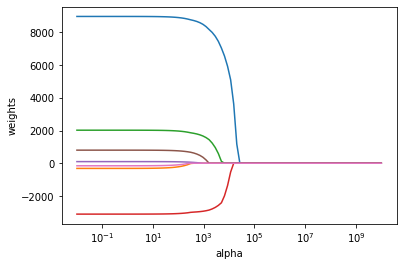

In [29]:
# by plotting the coefficients, I can clearly see that after which point the regression model becomes 
# something like a function only has intercept value.
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Between 10^3 and 10^5, the model becomes biased, so no need to use the values between those.

In [30]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1000, random_state=34)
lassocv.fit(X_train, Y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
lasso_best_predict = lasso.predict(df_test)

print("Lasso Mea: ", mea(Y_test, lasso.predict(X_test)))
print("Third ERROR -> Lasso R2: ", r2_score(Y_test, lasso.predict(X_test)))
print()
# print(len(lasso.coef_))
print(pd.Series(lasso.coef_, index=X_train.columns))
# print(*lasso_best_predict, sep="\n")
errors["third"] = r2_score(Y_test, lasso.predict(X_test))
cv_errors["third"] = cross_val_score(lasso, X_train, Y_train, cv=kf5, scoring="r2").mean()
print("Third CV_Score, mean of the 5: ", cv_errors["third"])

Lasso Mea:  3001.5841307457576
Third ERROR -> Lasso R2:  0.9011697154655155

Year      41328.834610
Type       -387.024481
Shift      4328.396626
km       -19795.029431
Power       760.399721
Engine     6469.170063
Seller     -294.822109
dtype: float64
Third CV_Score, mean of the 5:  0.861336060022843


So as we can see, lasso model has a better R2 score. 
If km increases, it decreases the price.
if shift incrases, it increases the price.
if year incrases (new car), it increases the price.
if power incrases, it increases the price.
if engine increases, it increases the price.
if seller decreases (1-seller, 2-owner), it increases the price.

So for now, by looking at the coefficients, it seems logical to me to accept the coefficients to a certain extent. By feeding more data into it, it would come up with a better R2 score I think.

In [31]:
df_test.head(10)
# X_normal.head(10)

,Year,Type,Shift,km,Power,Engine,Seller
0,0.851852,2,1,0.130435,0.165746,0.332126,1
1,0.518519,3,1,0.234783,0.193370,0.309179,2
2,0.555556,3,1,0.292391,0.193370,0.309179,1
3,0.370370,1,1,0.434783,0.248619,0.502415,2
4,0.481481,2,1,0.365217,0.033149,0.758454,1
5,0.888889,3,1,0.031087,0.220994,0.309179,1
6,0.666667,1,2,0.195576,0.171271,0.275362,1
7,0.555556,3,1,0.236957,0.171271,0.275362,1
8,0.814815,2,1,0.193478,0.165746,0.332126,1
9,0.333333,3,1,0.336957,0.110497,0.272947,1


# WITH POLYNOMIAL FEATURES
In order to not repeat myself, I will not detail the coming

### Ridge and Linear Regression with polynomial features

In [32]:
### BELOW IS DONE WITH ADDING POLYNOMIAL FEATURES
poly_features = PolynomialFeatures(degree=2)
X_normal_poly = poly_features.fit_transform(X_normal)
df_test_poly = poly_features.transform(df_test)
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_normal_poly, Y_normal, test_size=0.2, random_state=34)


In [33]:
#Ridge Regression
# Using every alpha values that I have in order to find the best
ridge_model = Ridge(random_state=34)
coefs = []
# I am just calculating the alpha values, so I don't actually need to split the training data for that
for alpha in alphas:
    ridge_model.set_params(alpha=alpha)
    ridge_model.fit(X_normal_poly, Y_normal)
    coefs.append(ridge_model.coef_)

Text(0, 0.5, 'weights')

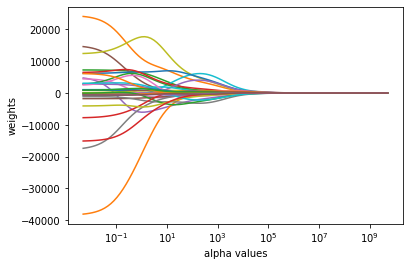

In [34]:
# let's find out how it looks like
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha values")
plt.ylabel("weights")
# print(*np.sum(coefs, axis=1),sep="\n")

Between 10^3 and 10^5, the model becomes biased, so no need to use the values between those

In [35]:
#normal linear regression
linear_regression = Ridge(alpha=0, random_state=34)
linear_regression.fit(X_train_poly, Y_train_poly)
pred_l_reg = linear_regression.predict(X_test_poly)
print("Features: ")
print(pd.Series(linear_regression.coef_, index=list(range(len(X_test_poly.T)))))
print("MEA: ", mea(pred_l_reg, Y_test))
print("R2: ", r2_score(pred_l_reg, Y_test))

Features: 
0     2.484067e+16
1     2.610445e+04
2     6.182199e+03
3     5.447107e+16
4     2.749795e+03
5     1.098014e+04
6     3.809877e+02
7     6.603844e+16
8     9.079937e+03
9    -3.866657e+02
10    5.567706e+03
11   -4.122714e+04
12    2.588789e+03
13    1.113009e+04
14    5.648107e+02
15   -1.624285e+03
16   -7.285717e+01
17   -2.231265e+01
18    9.741153e+02
19    1.326378e+03
20   -2.416859e+02
21   -1.815702e+16
22   -2.581536e+03
23   -7.300389e+03
24    2.742291e+03
25    8.967634e+02
26    3.231894e+03
27   -7.770755e+03
28    1.082125e+03
29    3.433017e+03
30   -1.046868e+03
31   -3.269546e+02
32    1.938201e+03
33   -1.503831e+04
34   -3.773181e+02
35   -2.201281e+16
dtype: float64
MEA:  2653.3379310344826
R2:  0.9138311048417629


In [36]:
ridge_cv = RidgeCV(alphas=alphas, scoring="neg_mean_squared_error")
ridge_cv.fit(X_train_poly, Y_train_poly)
print("Best of alhpa: ", ridge_cv.alpha_)

Best of alhpa:  0.4348745013088917


In [47]:
ridge_final_poly = Ridge(alpha=ridge_cv.alpha_, random_state=34)
ridge_final_poly.fit(X_train_poly, Y_train_poly)
predict_final_poly = ridge_final_poly.predict(X_test_poly)
print("MEA Final: ", mea(predict_final_poly, Y_test_poly))
print("Fourth ERROR R2 Final: ", r2_score(predict_final_poly, Y_test_poly))
errors["fourth"] = r2_score(predict_final_poly, Y_test_poly)
cv_errors["fourth"] = cross_val_score(ridge_final_poly, X_train_poly, Y_train_poly, cv=kf5, scoring="r2").mean()
print("Fourth CV_Score, mean of the 5: ", cv_errors["fourth"])

MEA Final:  2648.332618668403
Fourth ERROR R2 Final:  0.9135032597754309
Fourth CV_Score, mean of the 5:  0.881194985845107


### Lasso Regression with polynomial features

In [38]:
lasso = Lasso(max_iter = 100_000, random_state=34)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(X_train_poly), Y_train_poly)
    coefs.append(lasso.coef_)
    

c:\users\semih\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.146e+09, tolerance: 3.737e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\semih\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.146e+09, tolerance: 3.737e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\semih\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

In [39]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100_000, random_state=34)
lassocv.fit(X_train_poly, Y_train_poly)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_poly, Y_train_poly)
lasso_best_predict = lasso.predict(df_test_poly)

print("Lasso POLYNOMIAL Mea: ", mea(Y_test_poly, lasso.predict(X_test_poly)))
print("Fifth Error -> Lasso POLYNOMIAL R2 : ", r2_score(Y_test_poly, lasso.predict(X_test_poly)))
print(len(lasso.coef_))
# print(pd.Series(lasso.coef_, index=X_train.columns))
# print(*lasso_best_predict, sep="\n")
errors["fifth"] = r2_score(Y_test_poly, lasso.predict(X_test_poly))
cv_errors["fifth"] = cross_val_score(lasso, X_train_poly, Y_train_poly, cv=kf5, scoring="r2").mean()
print("Fourth CV_Score, mean of the 5: ", cv_errors["fifth"])

Lasso POLYNOMIAL Mea:  2751.8599468614766
Fifth Error -> Lasso POLYNOMIAL R2 :  0.9176009955674616
36
Fourth CV_Score, mean of the 5:  0.8781408874188245


# My Errors in Order

In [48]:
for key, value in errors.items():
    print(f"'{key}' R2 Error: {value}")
print("\n")
for key, value in cv_errors.items():
    print(f"'{key}' Cross Validation Score: {value}")

'first' R2 Error: 0.8885579307340242
'second' R2 Error: 0.8881490737376665
'third' R2 Error: 0.9011697154655155
'fourth' R2 Error: 0.9135032597754309
'fifth' R2 Error: 0.9176009955674616


'first' Cross Validation Score: 0.8622874951869945
'second' Cross Validation Score: 0.8620426101877475
'third' Cross Validation Score: 0.861336060022843
'fourth' Cross Validation Score: 0.881194985845107
'fifth' Cross Validation Score: 0.8781408874188245


## Evaluation
Since the R2 error near to 1 is better, it would be wiser to choose the model had the highest R2 square but besides that the model also has to have a high cross validation score as well in order to decrease the change of overfitting. Because of these, I think that the fourth and the fifth models are likely to be chosen.


In [41]:
print("R2 Error differences of the fourth and the fifth model", errors["fourth"] - errors["fifth"])
print("Cross validation score differences of the fourth and the fifth model", cv_errors["fourth"] - cv_errors["fifth"])

R2 Error differences of the fourth and the fifth model -0.0040977357920306545
Cross validation score differences of the fourth and the fifth model 0.0027889971647399037


Based on the above values, I have the intuition that the fourth model can perform better in an unseen dataset because of the better cross validation error. So I have chosen <b>the Fourth Model</b>

In [51]:
predict_final_poly_test = ridge_final_poly.predict(df_test_poly)
with open("Results.txt", "w") as price_file:
    price_file.writelines([str(item)+"\n" for item in predict_final_poly_test])

### Below are the predicted prices

In [52]:
print(*predict_final_poly_test, sep='\n')

45696.480951026206
27022.643804331554
28196.499473868476
20928.1508478034
23957.256861807055
49082.78238032914
38551.38111359114
29084.455960238676
42309.41303678447
20548.854737861435
51049.89308002431
20208.336835944378
48021.30815309693
37301.58324970002
29499.200010857276
35350.28195651817
36720.51188781773
28842.837811336198
29074.793540258455
55836.05589492937
53194.57096854892
22626.17608773846
20558.035274519578
50965.69243925161
19613.522989802226
15058.199675154436
47260.43326282565
29065.40969700084
17523.89652344688
20844.14951982702
22690.918406855337
48763.24099370482
23946.459666410334
51211.20715911753
42140.90719779164
21869.44883720509
56619.90411577102
33713.05705060813
43958.195403936756
20601.899423012335
24285.535453635413
26702.757326676787
36025.99173346207
15535.586669258697
47053.615127020734
50318.960363382925
18434.31743208351
41884.96497346401
26165.962402106434
24743.535461686402
49981.652880483045
54109.41125243909
25366.53507071793
43569.69144989476
2638